In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [1]:
!pip install pennylane
from IPython.display import clear_output
clear_output()

In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Loading Raw Data

In [92]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [93]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [94]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [95]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [96]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [97]:
num_sample = 200
n_class = 2
mult_test = 2.5

X_train = x_train_list[0][:num_sample, :]
X_test = x_test_list[0][:int(mult_test*num_sample), :]

Y_train = np.zeros((n_class*X_train.shape[0],), dtype=int)
Y_test = np.zeros((n_class*X_test.shape[0],), dtype=int)

for i in range(n_class-1):
  X_train = np.concatenate((X_train, x_train_list[i+1][:num_sample, :]), axis=0)
  Y_train[num_sample*(i+1):num_sample*(i+2)] = int(i+1)

  X_test = np.concatenate((X_test, x_test_list[i+1][:int(mult_test*num_sample), :]), axis=0)
  Y_test[int(mult_test*num_sample*(i+1)):int(mult_test*num_sample*(i+2))] = int(i+1)


Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(400, 784) (400, 2)
(1000, 784) (1000, 2)


# Dataset Preprocessing (Standardization + PCA)

## Standardization

In [98]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [99]:
X_train, mu_train, std_train = normalize(X_train)
X_train.shape, Y_train.shape

((400, 784), (400, 2))

In [100]:
X_test = (X_test - mu_train)/(std_train + 1e-8)
X_test.shape, Y_test.shape

((1000, 784), (1000, 2))

## PCA

In [101]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [102]:
num_component = 6
pca = PCA(n_components=num_component, svd_solver='full')

In [103]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [104]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21719476, 0.32237275, 0.37662654, 0.42807777, 0.46964521,
       0.50021544])

In [105]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [106]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(400, 6) (400, 2)
(1000, 6) (1000, 2)


## Norm

In [107]:
X_train = (X_train.T / np.sqrt(np.sum(X_train ** 2, -1))).T
X_test = (X_test.T / np.sqrt(np.sum(X_test ** 2, -1))).T

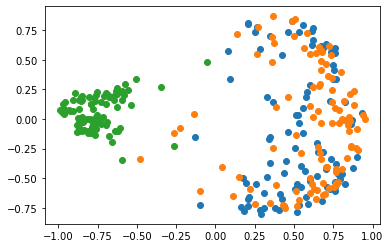

In [108]:
plt.scatter(X_train[:100, 0], X_train[:100, 1])
plt.scatter(X_train[100:200, 0], X_train[100:200, 1])
plt.scatter(X_train[200:300, 0], X_train[200:300, 1])

# Data Re-uploading Classifier

In [109]:
from qiskit import *
import numpy as np

# Set a random seed
np.random.seed(42)

In [117]:
def drc_circuit(x_sample, parameters, num_features, layer=1):
    q_reg = QuantumRegister(1)
    c_reg = ClassicalRegister(1)
    circuit = QuantumCircuit(q_reg, c_reg)
    
    # Layer iteration
    for i in range(layer):
        # Gate iteration
        for j in range(int(num_features/3)):
            circuit.u(*x_sample[3*j:3*(j+1)], 0)
            circuit.u(*parameters[3*j:3*(j+1)], 0)
    
    circuit.measure(0,0)
    
    return circuit

In [118]:
num_features = 6
params = np.random.uniform(size=(num_features + 2))
params

array([0.18182497, 0.18340451, 0.30424224, 0.52475643, 0.43194502,
       0.29122914, 0.61185289, 0.13949386])

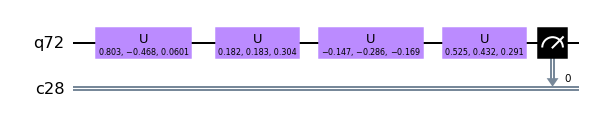

In [119]:
drc_circuit(X_train[0], params, num_features).draw('mpl')

In [189]:
shots=1000
backend = Aer.get_backend('qasm_simulator')
L = 1
num_features = 6

def weighted_fidelity_cost_function(params):
    loss = 0
    
    # Training sample iteration
    for k in range(len(X_train)):
        q_reg = QuantumRegister(1)
        c_reg = ClassicalRegister(1)
        circuit = QuantumCircuit(q_reg, c_reg)
    
        # Layer iteration
        for i in range(L):
            # Gate iteration
            for j in range(int(num_features/3)):
                circuit.u(*X_train[k][3*j:3*(j+1)], 0)
                circuit.u(*params[3*j:3*(j+1)], 0)
    
        circuit.measure(0,0)
        
        t_circ = transpile(circ, backend)
        qobj = assemble(t_circ, shots=shots)
        job = backend.run(qobj)
        result = job.result().get_counts(circ)

        counts = np.array(list(result.values()))
        # Pauli-Z eigenvalue
        states = np.array([0, -1])
        # Compute probabilities for each state
        probabilities = counts / shots
        # Get state expectation
        z_expectation = np.sum(states * probabilities)
        # Get weighted fidelity
        fidel_0 = params[-2]*(1 + z_expectation)/2
        fidel_1 = params[-1]*(1 - z_expectation)/2
        # Calculate the loss from the sample
        loss += ((fidel_0-Y_train[0,0])**2 + (fidel_1-Y_train[0,1])**2)/2

    loss = loss/len(X_train)
    
    return loss

In [190]:
weighted_fidelity_cost_function(params)

0.336798652371836

In [179]:
from scipy.optimize import minimize

In [181]:
out = minimize(weighted_fidelity_cost_function, x0=params, method='L-BFGS-B', options={'maxiter':10000})
print(out)

      fun: 0.33670428161977173
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2275.055388  , 15915.19290666, 15610.29045801, 22166.77693502,
       14716.51891142, 23405.65362902,  8860.97244368,  1916.22601545])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 333
      nit: 1
   status: 2
  success: False
        x: array([0.18182417, 0.18340511, 0.30424216, 0.52475616, 0.43194448,
       0.291229  , 0.61185198, 0.13949317])


In [188]:
params

array([0.18182497, 0.18340451, 0.30424224, 0.52475643, 0.43194502,
       0.29122914, 0.61185289, 0.13949386])

In [193]:
from qiskit.aqua.components.optimizers import ADAM
from qiskit.aqua.components.optimizers import L_BFGS_B

In [201]:
opt_adam = ADAM(maxiter=100)
opt_lbfgsb = L_BFGS_B(maxiter=100, iprint=10)

In [202]:
out = opt_adam.optimize(num_vars=8, objective_function=weighted_fidelity_cost_function, initial_point=params)

In [198]:
out

(array([0.18182448, 0.18340392, 0.30424252, 0.52475691, 0.43194548,
        0.2912295 , 0.61185243, 0.13949486]), 0.3366290836467069, 333)

In [200]:
out

(array([0.17530649, 0.17873645, 0.29803902, 0.51703084, 0.42415907,
        0.28472427, 0.61295787, 0.13331547]), 0.33614476303529633, 10)

In [203]:
out

(array([0.17711625, 0.16534477, 0.29187459, 0.50591015, 0.41388747,
        0.28024389, 0.58790139, 0.122786  ]), 0.3414483298470301, 100)

In [132]:
params

array([0.18182497, 0.18340451, 0.30424224, 0.52475643, 0.43194502,
       0.29122914, 0.61185289, 0.13949386])

In [136]:
weights = np.random.rand(num_features + 2)
weights = tf.Variable(weights, dtype=tf.float64, trainable=True)

In [141]:
weights.numpy()

array([0.29214465, 0.36636184, 0.45606998, 0.78517596, 0.19967378,
       0.51423444, 0.59241457, 0.04645041])

In [144]:
shots=2000
backend = Aer.get_backend('qasm_simulator')
L = 1

def drc_pred(params):
    params = params.numpy()
    pred = np.zeros((len(X_train),2))
    
    # Training sample iteration
    for i in range(len(X_train)):
        circ = drc_circuit(X_train[i], params, num_features, layer=L)
        t_circ = transpile(circ, backend)
        qobj = assemble(t_circ)
        job = backend.run(qobj, shots=shots)
        result = job.result().get_counts(circ)

        counts = np.array(list(result.values()))
        # Pauli-Z eigenvalue
        states = np.array([0, -1])
        # Compute probabilities for each state
        probabilities = counts / shots
        # Get state expectation
        z_expectation = np.sum(states * probabilities)
        # Get weighted fidelity
        fidel_0 = params[-2]*(1 + z_expectation)/2
        fidel_1 = params[-1]*(1 - z_expectation)/2
        pred[i] = np.array([fidel_0, fidel_1])
        
    
    return pred

In [146]:
optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [164]:
def loss(params):
    pred = drc_pred(params)
    return tf.keras.losses.MeanSquaredError()(Y_train, pred)

In [165]:
loss(weights)

<tf.Tensor: shape=(), dtype=float64, numpy=0.42040330171585083>

In [167]:
optimizer.minimize(lambda: loss(weights), [weights])

ValueError: No gradients provided for any variable: ['Variable:0'].